**DATA CLEANING**

Here I am doing basic data cleaning to find which features have a lot of missing values and should be dropped 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving tvm experiment data.csv to tvm experiment data.csv


In [2]:
import pandas as pd
demand_data = pd.read_csv("tvm experiment data.csv")

In [14]:
demand_data.head(5)

,Date_Time,Relative Humidity in %,Rainfall in mm,Temperature in Degree C,Radiation value in MJ/m^2,Kerala Holidays,Day of the week,Demand during this hour,Hourly Avg. of Prev. week,Demand in MW
0,1/1/2017 0:00,87.0,0.0,25.5,NaN,True,1.0,2398.66,2398.66,2398.66
1,1/1/2017 1:00,85.0,0.0,26.2,NaN,True,1.0,2238.83,2238.83,2238.83
2,1/1/2017 2:00,91.0,0.0,25.6,NaN,True,1.0,2161.29,2161.29,2161.29
3,1/1/2017 3:00,93.0,0.0,25.3,NaN,True,1.0,2094.65,2094.65,2094.65
4,1/1/2017 4:00,93.0,0.0,24.4,NaN,True,1.0,2064.19,2064.19,2064.19


**Findling Missing Values**

In [20]:
print(demand_data["Demand in MW"][pd.isna(demand_data[ "Rainfall in mm"])].count()) # we have 3198 missing values for rainfall
print(demand_data["Demand in MW"][pd.isna(demand_data[ "Relative Humidity in %"])].count()) # we have 11948 missing values. So we can drop this column from our final data set
print(demand_data["Demand in MW"][pd.isna(demand_data[ "Temperature in Degree C"])].count()) # we have 15609 missing values in  temperature column, so we can get rid of that as well
print(demand_data["Demand in MW"][pd.isna(demand_data[ "Radiation value in MJ/m^2"])].count()) # we have 17372 missing values in  temperature column, so we can get rid of that as well

3198
11948
15609
17372


In [30]:
final = demand_data.drop(columns = ["Relative Humidity in %", "Temperature in Degree C", "Radiation value in MJ/m^2" ])
final.head(5)

,Date_Time,Rainfall in mm,Kerala Holidays,Day of the week,Demand during this hour,Hourly Avg. of Prev. week,Demand in MW
0,1/1/2017 0:00,0.0,True,1.0,2398.66,2398.66,2398.66
1,1/1/2017 1:00,0.0,True,1.0,2238.83,2238.83,2238.83
2,1/1/2017 2:00,0.0,True,1.0,2161.29,2161.29,2161.29
3,1/1/2017 3:00,0.0,True,1.0,2094.65,2094.65,2094.65
4,1/1/2017 4:00,0.0,True,1.0,2064.19,2064.19,2064.19


In [31]:

time = pd.to_datetime(final["Date_Time"]).dt.time
final.insert(1,"Time", time, True)
final

,Date_Time,Time,Rainfall in mm,Kerala Holidays,Day of the week,Demand during this hour,Hourly Avg. of Prev. week,Demand in MW
0,1/1/2017 0:00,00:00:00,0.0,True,1.0,2398.66,2398.660000,2398.66
1,1/1/2017 1:00,01:00:00,0.0,True,1.0,2238.83,2238.830000,2238.83
2,1/1/2017 2:00,02:00:00,0.0,True,1.0,2161.29,2161.290000,2161.29
3,1/1/2017 3:00,03:00:00,0.0,True,1.0,2094.65,2094.650000,2094.65
4,1/1/2017 4:00,04:00:00,0.0,True,1.0,2064.19,2064.190000,2064.19
...,...,...,...,...,...,...,...,...
26275,12/31/2019 19:00,19:00:00,NaN,False,NaN,3682.16,3545.731429,3740.26
26276,12/31/2019 20:00,20:00:00,NaN,False,NaN,3630.50,3504.540000,3616.52
26277,12/31/2019 21:00,21:00:00,NaN,False,NaN,3554.56,3459.067143,3555.91
26278,12/31/2019 22:00,22:00:00,NaN,False,NaN,3540.41,3432.617143,3413.72


**Visualizing Data to draw insights**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


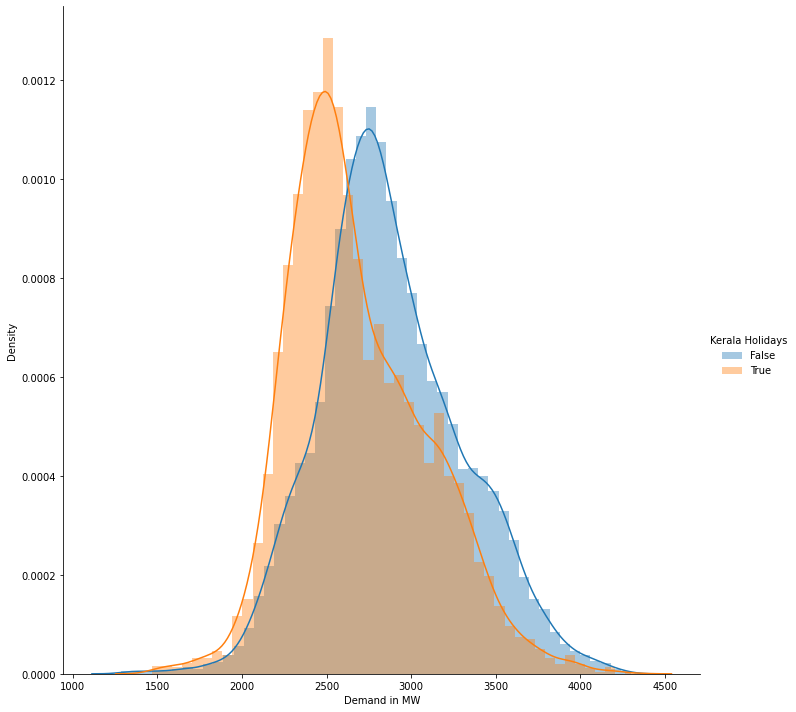

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
newplot = sns.FacetGrid(final, hue="Kerala Holidays", size=10);
newplot.map(sns.distplot, "Demand in MW"); 
newplot.add_legend();
plt.show();

In [118]:
print("The average demand on a holiday is", final["Demand in MW"][final["Kerala Holidays"] == True].mean())
print("The average demand on a non -holiday is", final["Demand in MW"][final["Kerala Holidays"] == False].mean())

The average demand on a holiday is 2680.8731966145874
The average demand on a non -holiday is 2874.945369487503


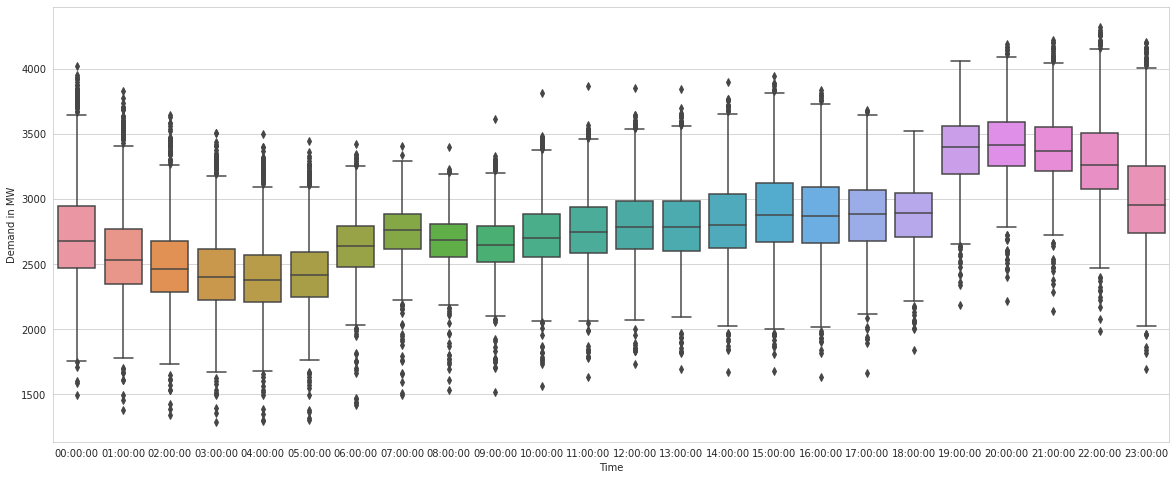

In [119]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Time',y='Demand in MW', data=final)
plt.show()

We can see here that time of the day has a big significance on demand during that time. 





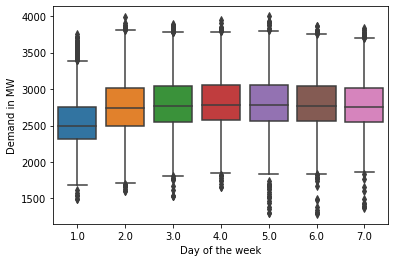

In [74]:
sns.boxplot(x='Day of the week',y='Demand in MW', data=final)
plt.show()

We can also see that day of the week also shows a change in demand(Sunday has lower demand than other days)

**Building the model**

1.   Data Cleaning and imputing missing values
2.   Splitting between input and output data
3.  Column Standardization of data
4.   Splitting into train test data
5. Applying linear regression on our data
6. Error Calculations and Observations



In [98]:
#Creating input data(X) and output data(Y)
import numpy as np
X = final.drop([ "Date_Time", "Demand in MW"], axis = 1)
Y = final["Demand in MW"]
X["Time"] = X["Time"].map(str)
time_array = np.array(X["Time"])
for i in range(len(time_array)):
  time_array[i] = time_array[i][0:2]
X["Time"] = time_array 
X

,Time,Rainfall in mm,Kerala Holidays,Day of the week,Demand during this hour,Hourly Avg. of Prev. week
0,00,0.0,True,1.0,2398.66,2398.660000
1,01,0.0,True,1.0,2238.83,2238.830000
2,02,0.0,True,1.0,2161.29,2161.290000
3,03,0.0,True,1.0,2094.65,2094.650000
4,04,0.0,True,1.0,2064.19,2064.190000
...,...,...,...,...,...,...
26275,19,NaN,False,NaN,3682.16,3545.731429
26276,20,NaN,False,NaN,3630.50,3504.540000
26277,21,NaN,False,NaN,3554.56,3459.067143
26278,22,NaN,False,NaN,3540.41,3432.617143


In [122]:
#imputing missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=100, random_state=0,min_value=0.0)
X = imp.fit_transform(X)



In [123]:
#applying standard scalar to scale all the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_demand_data = scaler.fit_transform(X, Y)


In [124]:
#splitting into training and testing data 
import sklearn.model_selection as cv
X_train, X_test, Y_train, Y_test = cv.train_test_split(new_demand_data, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17607, 6)
(8673, 6)
(17607,)
(8673,)


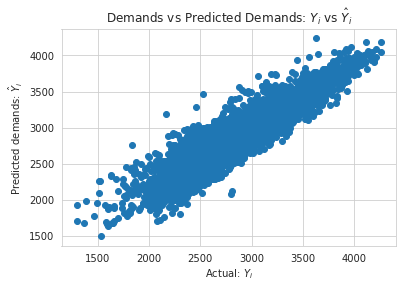

In [125]:
#Applying linear regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual: $Y_i$")
plt.ylabel("Predicted demands: $\hat{Y}_i$")
plt.title("Demands vs Predicted Demands: $Y_i$ vs $\hat{Y}_i$")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


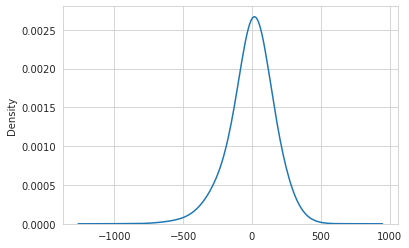

In [126]:
# pdf of errors
# we can see that most errors lie near 0 and almost all error values lie between -500 to 500
delta_y = Y_test - Y_pred;
import seaborn as sns;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


In [127]:
#MSE error obtained - 154MW
from sklearn.metrics import mean_squared_error
e_value = mean_squared_error(Y_test, Y_pred, squared = False)
print(e_value)

154.78729594888063


In [128]:
# Mean absolute error obtained - 114MW
from sklearn.metrics import mean_absolute_error
e2_value = mean_absolute_error(Y_test, Y_pred,)
print(e2_value)

114.33829047406724


In [129]:
from sklearn.metrics import mean_absolute_percentage_error
e3_value = mean_absolute_percentage_error(Y_test, Y_pred,)
print(e3_value)

0.04237474757686239
